## New York CitiBike Program

### Exploratory Data Analysis

The New York CitiBike program is the largest bicycle sharing service in the United States. Each month, the city makes the raw data of all rides taken in that month available. This data is available for developers, but the city itself does not publish analysis.

This project aims to create visualizations and summaries using the Tableau software package. However, the monthly data provided by the City is large and unworkable in Tableau. This notebook is used to explore the data and perform cleaning operations to produce csv files that can be easily used in Tableau.

I pulled data from Jan-Jun 2019 and Jan-Jun 2020 for comparison analysis and trends.

Citibike Data downloaded from this link: https://www.citibikenyc.com/system-data

In [6]:
# Import packages and set the working directory
import os
import glob   # python package that automatically detects all of the files ending with a .csv name within a specific working directory
import pandas as pd
import numpy as np

In [15]:
# Merging csv files (without repeating header)
all_files = glob.glob("*.csv") 
df = pd.concat((pd.read_csv(f, header = 0) for f in all_files))
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36916,2828,2020-06-30 23:53:19.7380,2020-07-01 00:40:28.5760,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,18351,Customer,1969,0
36917,2729,2020-06-30 23:54:44.0100,2020-07-01 00:40:13.6470,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,44401,Customer,1969,0
36918,2788,2020-06-30 23:54:52.1920,2020-07-01 00:41:20.6500,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,42334,Customer,1969,0
36919,2702,2020-06-30 23:56:14.6650,2020-07-01 00:41:16.7820,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,42463,Customer,1969,0


In [16]:
# path to CSV files

# path = r'C:\\Users\\BIJa\\OneDrive\\Documents\\Tableau_Challenge\\data' 

# pull in all the csv files into one dataframe

# all_files = glob.glob("*.csv")

# li = [] # variable to contain the list of all the csv files

# for filename in all_files:

#     df = pd.read_csv(filename, index_col=None, header=0)

#     li.append(df)

# frame = pd.concat(li, axis=0, ignore_index=True)
# df

## Data Exploration

### The data includes:

* Trip Duration (seconds)

* Start Time and Date

* Stop Time and Date

* Start Station Name

* End Station Name

* Station ID

* Station Lat/Long

* Bike ID

* User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)

* Gender (Zero=unknown; 1=male; 2=female)

* Year of Birth

In [17]:
# look at the distribution of tripduration
# convert starttime and stoptime to datetime objects
# look at the distribution of usertype
# distribution of birth year (Age)
# distribution of gender

In [18]:
# check for missing valuse and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308435 entries, 0 to 36920
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             308435 non-null  int64  
 1   starttime                308435 non-null  object 
 2   stoptime                 308435 non-null  object 
 3   start station id         308435 non-null  int64  
 4   start station name       308435 non-null  object 
 5   start station latitude   308435 non-null  float64
 6   start station longitude  308435 non-null  float64
 7   end station id           308435 non-null  int64  
 8   end station name         308435 non-null  object 
 9   end station latitude     308435 non-null  float64
 10  end station longitude    308435 non-null  float64
 11  bikeid                   308435 non-null  int64  
 12  usertype                 308435 non-null  object 
 13  birth year               308435 non-null  int64  
 14  gende

Looks like there are no missing values to clean up. However, tripduration may need to be converted from seconds to minutes and starttime and stoptime converted to datetime for easier data manipulation.

In [19]:
# convert trip duration from seconds to minutes & remove decimals
df['trip_minutes'] = round(df.tripduration / 60).apply(int)
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_minutes
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,3
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,8
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,13
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,26
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36916,2828,2020-06-30 23:53:19.7380,2020-07-01 00:40:28.5760,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,18351,Customer,1969,0,47
36917,2729,2020-06-30 23:54:44.0100,2020-07-01 00:40:13.6470,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,44401,Customer,1969,0,45
36918,2788,2020-06-30 23:54:52.1920,2020-07-01 00:41:20.6500,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,42334,Customer,1969,0,46
36919,2702,2020-06-30 23:56:14.6650,2020-07-01 00:41:16.7820,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,42463,Customer,1969,0,45


In [20]:
df['trip_minutes']

0         3
1         8
2        13
3        26
4        26
         ..
36916    47
36917    45
36918    46
36919    45
36920    44
Name: trip_minutes, Length: 308435, dtype: int64

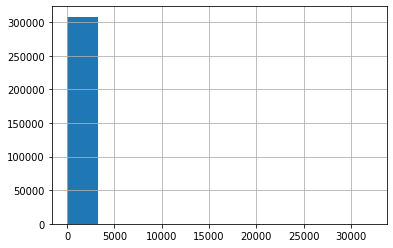

In [21]:
# look at the distribution of tripduration
df['trip_minutes'].hist()

It looks like we have some trips that lasted over 5000 minutes, some explanation could be, the person did not dock the bike at the end of their trip or the bike broke down, whatever the reason, these high figures could skew the data and distort the final analysis. 

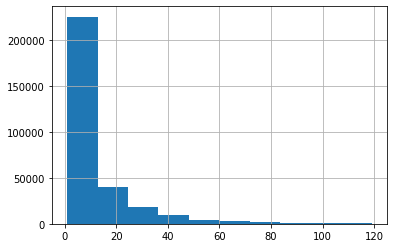

In [22]:
# look at the distribution of tripduration for trips less than 120 minutes
df[df.trip_minutes < 120].trip_minutes.hist()

The histogram shows majority of the trips are about 10 minutes, which is surprising as i expected the hump to be around 20 minutes.Could this be as a result of some trips having a very short duration, and does this affect the data distribution? 

In [23]:
# determine how many trips are less than 2 minutes.
df[df.trip_minutes <=2]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_minutes
14,111,2019-01-01 21:52:09.2980,2019-01-01 21:54:00.4550,3183,Exchange Place,40.716247,-74.033459,3183,Exchange Place,40.716247,-74.033459,29453,Subscriber,1987,1,2
18,121,2019-01-02 07:55:53.5040,2019-01-02 07:57:54.9410,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29122,Subscriber,1966,1,2
20,120,2019-01-02 08:18:36.9570,2019-01-02 08:20:37.9440,3183,Exchange Place,40.716247,-74.033459,3681,Grand St,40.715178,-74.037683,29602,Subscriber,1975,2,2
21,75,2019-01-02 08:25:25.9610,2019-01-02 08:26:41.4140,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29228,Subscriber,1975,1,1
22,113,2019-01-02 08:47:54.6750,2019-01-02 08:49:47.9970,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,40.719252,-74.034234,26278,Subscriber,1969,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36893,64,2020-06-30 23:08:44.8970,2020-06-30 23:09:49.6360,3209,Brunswick St,40.724176,-74.050656,3269,Brunswick & 6th,40.726012,-74.050389,42167,Subscriber,1984,1,1
36897,77,2020-06-30 23:12:37.8800,2020-06-30 23:13:55.2420,3209,Brunswick St,40.724176,-74.050656,3269,Brunswick & 6th,40.726012,-74.050389,42499,Subscriber,1984,1,1
36900,146,2020-06-30 23:16:52.2450,2020-06-30 23:19:18.4720,3194,McGinley Square,40.725340,-74.067622,3679,Bergen Ave,40.722104,-74.071455,42159,Subscriber,1999,1,2
36902,72,2020-06-30 23:19:35.5090,2020-06-30 23:20:47.9420,3203,Hamilton Park,40.727596,-74.044247,3270,Jersey & 6th St,40.725289,-74.045572,44237,Subscriber,1984,1,1


In [24]:
# drop rows with tripduration less than 1 minute
# df[df.trip_minutes !=< 2]
df=df.drop(df[df.trip_minutes.isin(["1", "2"])].index)
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_minutes
10,503,2019-01-01 17:34:50.9580,2019-01-01 17:43:14.3190,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29661,Customer,1992,1,8
11,285,2019-01-01 18:06:03.1680,2019-01-01 18:10:48.5380,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,29544,Subscriber,1990,1,5
12,229,2019-01-01 20:05:04.5760,2019-01-01 20:08:53.8630,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29307,Subscriber,1996,1,4
16,451,2019-01-02 00:08:06.5510,2019-01-02 00:15:38.0940,3183,Exchange Place,40.716247,-74.033459,3681,Grand St,40.715178,-74.037683,29453,Subscriber,1960,1,8
17,742,2019-01-02 07:17:22.2050,2019-01-02 07:29:45.1610,3183,Exchange Place,40.716247,-74.033459,3270,Jersey & 6th St,40.725289,-74.045572,29608,Subscriber,1977,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36916,2828,2020-06-30 23:53:19.7380,2020-07-01 00:40:28.5760,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,18351,Customer,1969,0,47
36917,2729,2020-06-30 23:54:44.0100,2020-07-01 00:40:13.6470,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,44401,Customer,1969,0,45
36918,2788,2020-06-30 23:54:52.1920,2020-07-01 00:41:20.6500,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,42334,Customer,1969,0,46
36919,2702,2020-06-30 23:56:14.6650,2020-07-01 00:41:16.7820,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,42463,Customer,1969,0,45


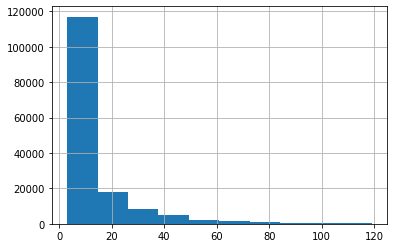

In [25]:
df[df.trip_minutes < 120].trip_minutes.hist()

There were 21438 rows that had a tripduration of less than 2 minutes. Looking at the resulting histogram, these records did not have a significant effect on the output. We can ignore those for now.

In [26]:
# convert starttime and stoptime to datetime objects
from datetime import datetime

df.starttime = df.starttime.apply(pd.to_datetime)
df.stoptime = df.stoptime.apply(pd.to_datetime)
df

C:\Users\BIJa\Anaconda3\envs\pythondata\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_minutes
10,503,2019-01-01 17:34:50.958,2019-01-01 17:43:14.319,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29661,Customer,1992,1,8
11,285,2019-01-01 18:06:03.168,2019-01-01 18:10:48.538,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,29544,Subscriber,1990,1,5
12,229,2019-01-01 20:05:04.576,2019-01-01 20:08:53.863,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29307,Subscriber,1996,1,4
16,451,2019-01-02 00:08:06.551,2019-01-02 00:15:38.094,3183,Exchange Place,40.716247,-74.033459,3681,Grand St,40.715178,-74.037683,29453,Subscriber,1960,1,8
17,742,2019-01-02 07:17:22.205,2019-01-02 07:29:45.161,3183,Exchange Place,40.716247,-74.033459,3270,Jersey & 6th St,40.725289,-74.045572,29608,Subscriber,1977,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36916,2828,2020-06-30 23:53:19.738,2020-07-01 00:40:28.576,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,18351,Customer,1969,0,47
36917,2729,2020-06-30 23:54:44.010,2020-07-01 00:40:13.647,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,44401,Customer,1969,0,45
36918,2788,2020-06-30 23:54:52.192,2020-07-01 00:41:20.650,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,42334,Customer,1969,0,46
36919,2702,2020-06-30 23:56:14.665,2020-07-01 00:41:16.782,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,42463,Customer,1969,0,45


In [27]:
# split the starttime column into 2 new columns ; Start Day and Start Time

df['Start Day'] = [d.date() for d in df['starttime']]
df['Start Time'] = [d.time() for d in df['starttime']]
df

C:\Users\BIJa\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\BIJa\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_minutes,Start Day,Start Time
10,503,2019-01-01 17:34:50.958,2019-01-01 17:43:14.319,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29661,Customer,1992,1,8,2019-01-01,17:34:50.958000
11,285,2019-01-01 18:06:03.168,2019-01-01 18:10:48.538,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,29544,Subscriber,1990,1,5,2019-01-01,18:06:03.168000
12,229,2019-01-01 20:05:04.576,2019-01-01 20:08:53.863,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29307,Subscriber,1996,1,4,2019-01-01,20:05:04.576000
16,451,2019-01-02 00:08:06.551,2019-01-02 00:15:38.094,3183,Exchange Place,40.716247,-74.033459,3681,Grand St,40.715178,-74.037683,29453,Subscriber,1960,1,8,2019-01-02,00:08:06.551000
17,742,2019-01-02 07:17:22.205,2019-01-02 07:29:45.161,3183,Exchange Place,40.716247,-74.033459,3270,Jersey & 6th St,40.725289,-74.045572,29608,Subscriber,1977,1,12,2019-01-02,07:17:22.205000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36916,2828,2020-06-30 23:53:19.738,2020-07-01 00:40:28.576,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,18351,Customer,1969,0,47,2020-06-30,23:53:19.738000
36917,2729,2020-06-30 23:54:44.010,2020-07-01 00:40:13.647,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,44401,Customer,1969,0,45,2020-06-30,23:54:44.010000
36918,2788,2020-06-30 23:54:52.192,2020-07-01 00:41:20.650,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,42334,Customer,1969,0,46,2020-06-30,23:54:52.192000
36919,2702,2020-06-30 23:56:14.665,2020-07-01 00:41:16.782,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,42463,Customer,1969,0,45,2020-06-30,23:56:14.665000


In [28]:
# split the stoptime column into 2 new columns ; Stop Day and Stop Time

df['Stop Day'] = [d.date() for d in df['stoptime']]
df['Stop Time'] = [d.time() for d in df['stoptime']]
df

C:\Users\BIJa\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\BIJa\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_minutes,Start Day,Start Time,Stop Day,Stop Time
10,503,2019-01-01 17:34:50.958,2019-01-01 17:43:14.319,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29661,Customer,1992,1,8,2019-01-01,17:34:50.958000,2019-01-01,17:43:14.319000
11,285,2019-01-01 18:06:03.168,2019-01-01 18:10:48.538,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,29544,Subscriber,1990,1,5,2019-01-01,18:06:03.168000,2019-01-01,18:10:48.538000
12,229,2019-01-01 20:05:04.576,2019-01-01 20:08:53.863,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29307,Subscriber,1996,1,4,2019-01-01,20:05:04.576000,2019-01-01,20:08:53.863000
16,451,2019-01-02 00:08:06.551,2019-01-02 00:15:38.094,3183,Exchange Place,40.716247,-74.033459,3681,Grand St,40.715178,-74.037683,29453,Subscriber,1960,1,8,2019-01-02,00:08:06.551000,2019-01-02,00:15:38.094000
17,742,2019-01-02 07:17:22.205,2019-01-02 07:29:45.161,3183,Exchange Place,40.716247,-74.033459,3270,Jersey & 6th St,40.725289,-74.045572,29608,Subscriber,1977,1,12,2019-01-02,07:17:22.205000,2019-01-02,07:29:45.161000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36916,2828,2020-06-30 23:53:19.738,2020-07-01 00:40:28.576,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,18351,Customer,1969,0,47,2020-06-30,23:53:19.738000,2020-07-01,00:40:28.576000
36917,2729,2020-06-30 23:54:44.010,2020-07-01 00:40:13.647,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,44401,Customer,1969,0,45,2020-06-30,23:54:44.010000,2020-07-01,00:40:13.647000
36918,2788,2020-06-30 23:54:52.192,2020-07-01 00:41:20.650,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,42334,Customer,1969,0,46,2020-06-30,23:54:52.192000,2020-07-01,00:41:20.650000
36919,2702,2020-06-30 23:56:14.665,2020-07-01 00:41:16.782,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,42463,Customer,1969,0,45,2020-06-30,23:56:14.665000,2020-07-01,00:41:16.782000


In [29]:
# distribution of gender
df.gender.value_counts()

1    103353
2     37114
0     15407
Name: gender, dtype: int64

In [32]:
# Rename Gender column

df['gender'] = df['gender'].replace([0,1,2],['unknown',"Male","Female"])
# df["distance"] = ''
df.head()

C:\Users\BIJa\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,trip_minutes,Start Day,Start Time,Stop Day,Stop Time
10,503,2019-01-01 17:34:50.958,2019-01-01 17:43:14.319,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29661,Customer,1992,Male,8,2019-01-01,17:34:50.958000,2019-01-01,17:43:14.319000
11,285,2019-01-01 18:06:03.168,2019-01-01 18:10:48.538,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,29544,Subscriber,1990,Male,5,2019-01-01,18:06:03.168000,2019-01-01,18:10:48.538000
12,229,2019-01-01 20:05:04.576,2019-01-01 20:08:53.863,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29307,Subscriber,1996,Male,4,2019-01-01,20:05:04.576000,2019-01-01,20:08:53.863000
16,451,2019-01-02 00:08:06.551,2019-01-02 00:15:38.094,3183,Exchange Place,40.716247,-74.033459,3681,Grand St,40.715178,-74.037683,29453,Subscriber,1960,Male,8,2019-01-02,00:08:06.551000,2019-01-02,00:15:38.094000
17,742,2019-01-02 07:17:22.205,2019-01-02 07:29:45.161,3183,Exchange Place,40.716247,-74.033459,3270,Jersey & 6th St,40.725289,-74.045572,29608,Subscriber,1977,Male,12,2019-01-02,07:17:22.205000,2019-01-02,07:29:45.161000


In [18]:
# distribution of gender
df.gender.value_counts()

Male       18459
Female      9633
unknown     7863
Name: gender, dtype: int64

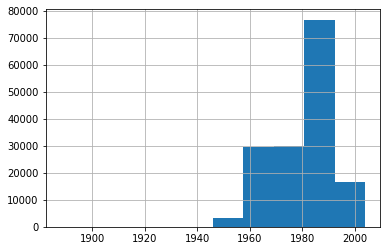

In [33]:
# distribution of birth year (Age)
df['birth year'].hist()

In [34]:
#Add Age column
# 
df['Age'] = 2020 - df['birth year']

#Exclude fake age (above 90)
df = df[df['Age'] < 100]
df


C:\Users\BIJa\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,trip_minutes,Start Day,Start Time,Stop Day,Stop Time,Age
10,503,2019-01-01 17:34:50.958,2019-01-01 17:43:14.319,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,...,29661,Customer,1992,Male,8,2019-01-01,17:34:50.958000,2019-01-01,17:43:14.319000,28
11,285,2019-01-01 18:06:03.168,2019-01-01 18:10:48.538,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,...,29544,Subscriber,1990,Male,5,2019-01-01,18:06:03.168000,2019-01-01,18:10:48.538000,30
12,229,2019-01-01 20:05:04.576,2019-01-01 20:08:53.863,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,...,29307,Subscriber,1996,Male,4,2019-01-01,20:05:04.576000,2019-01-01,20:08:53.863000,24
16,451,2019-01-02 00:08:06.551,2019-01-02 00:15:38.094,3183,Exchange Place,40.716247,-74.033459,3681,Grand St,40.715178,...,29453,Subscriber,1960,Male,8,2019-01-02,00:08:06.551000,2019-01-02,00:15:38.094000,60
17,742,2019-01-02 07:17:22.205,2019-01-02 07:29:45.161,3183,Exchange Place,40.716247,-74.033459,3270,Jersey & 6th St,40.725289,...,29608,Subscriber,1977,Male,12,2019-01-02,07:17:22.205000,2019-01-02,07:29:45.161000,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36916,2828,2020-06-30 23:53:19.738,2020-07-01 00:40:28.576,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,...,18351,Customer,1969,unknown,47,2020-06-30,23:53:19.738000,2020-07-01,00:40:28.576000,51
36917,2729,2020-06-30 23:54:44.010,2020-07-01 00:40:13.647,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,...,44401,Customer,1969,unknown,45,2020-06-30,23:54:44.010000,2020-07-01,00:40:13.647000,51
36918,2788,2020-06-30 23:54:52.192,2020-07-01 00:41:20.650,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,...,42334,Customer,1969,unknown,46,2020-06-30,23:54:52.192000,2020-07-01,00:41:20.650000,51
36919,2702,2020-06-30 23:56:14.665,2020-07-01 00:41:16.782,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,...,42463,Customer,1969,unknown,45,2020-06-30,23:56:14.665000,2020-07-01,00:41:16.782000,51


In [35]:
# look at the distribution of usertype
df.usertype.value_counts()

Subscriber    127516
Customer       28340
Name: usertype, dtype: int64

In [36]:
# Save New DataFrame To CSV in current directory
# os.chdir('C:\\Users\\BIJa\\OneDrive\\Desktop\\Tableau_Challenge\\data')

df.to_csv('combined_citiBike_data.csv', encoding='utf-8', index=False) #Saving our combined csv data as a new file!